In [1]:
import IPython
IPython.get_ipython().magic("load_ext autoreload")
IPython.get_ipython().magic("autoreload 2")

/tmp/ipykernel_592104/2580614648.py:2: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  IPython.get_ipython().magic("load_ext autoreload")
/tmp/ipykernel_592104/2580614648.py:3: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  IPython.get_ipython().magic("autoreload 2")


In [2]:
import sys
import os

# 获取项目根目录（即 `debug/` 目录的上一级）
project_root = "/home/shiqi_w/code/field-circuit-param-periodic-koopman"  # 假设 `debug/` 目录是你的工作目录

# 添加 `project_root` 到 sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
import torch
device = torch.device("cpu")

from src.args import parse_arguments, read_config_file

config_file = "/home/shiqi_w/code/field-circuit-param-periodic-koopman/configs/Plain/experiment_4_different.yaml"
config = read_config_file(config_file)

Explained variance by PCA: 99.93%


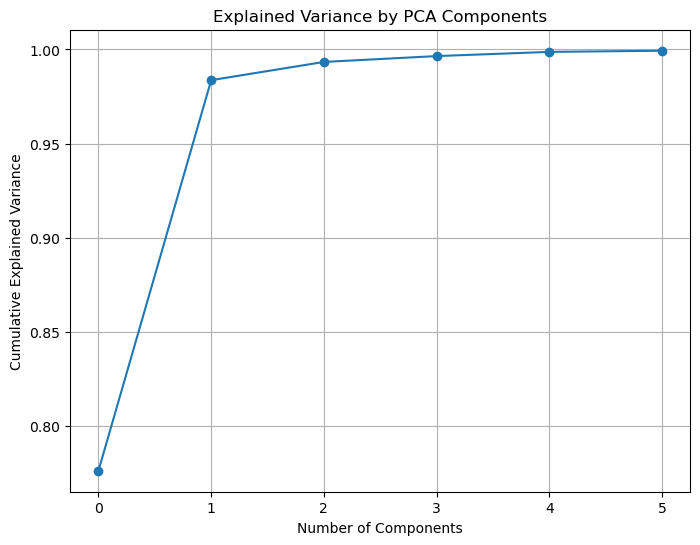

/home/shiqi_w/code/field-circuit-param-periodic-koopman/src/data.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_data = torch.tensor(training_data, dtype=torch.float64)
/home/shiqi_w/code/field-circuit-param-periodic-koopman/src/data.py:163: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_params = torch.tensor(training_params, dtype=torch.float64)
/home/shiqi_w/code/field-circuit-param-periodic-koopman/src/data.py:164: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  training_inputs = torch.tensor(training_inputs, dtype

In [15]:
from src.data import get_dataset
data_dir = config["data_dir"]
step_size = config["step_size"]
pca_dim = 6
batch_size = config["batch_size"]
validation_split = config["validation_split"]

train_loader, test_loader, dataset = get_dataset(data_dir, step_size, pca_dim, batch_size, validation_split)


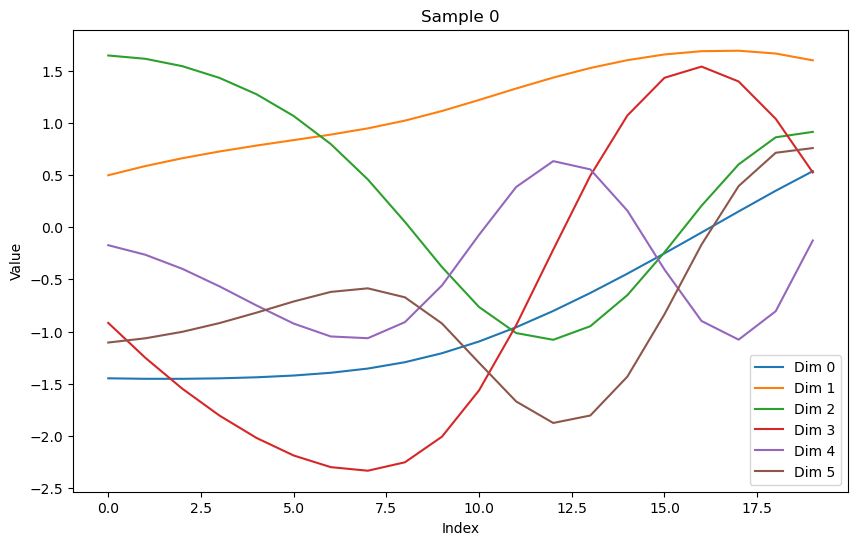

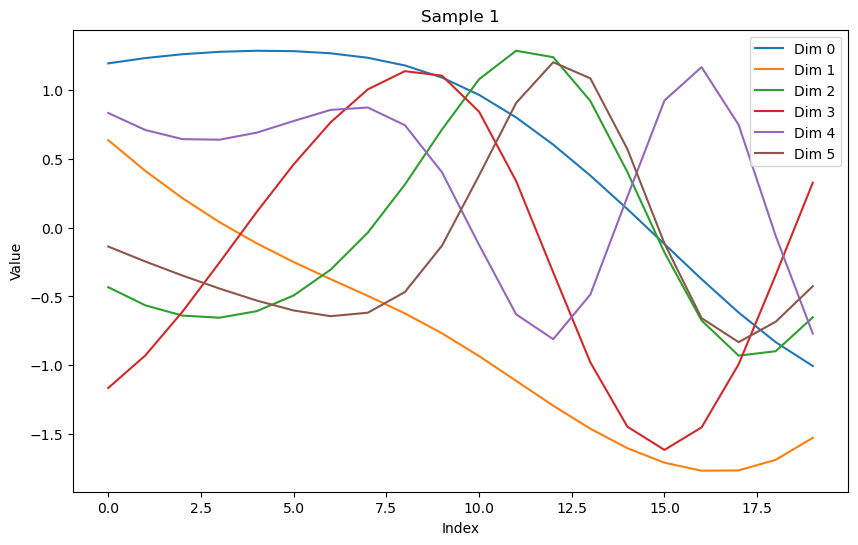

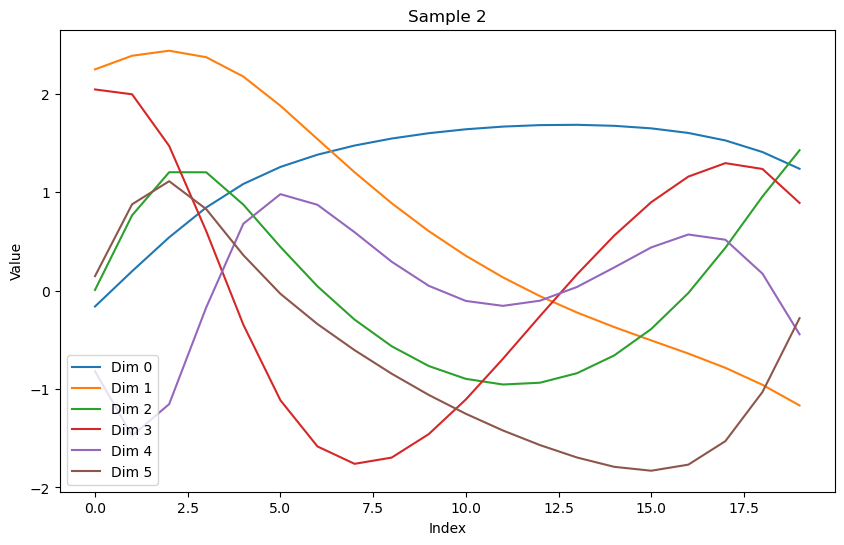

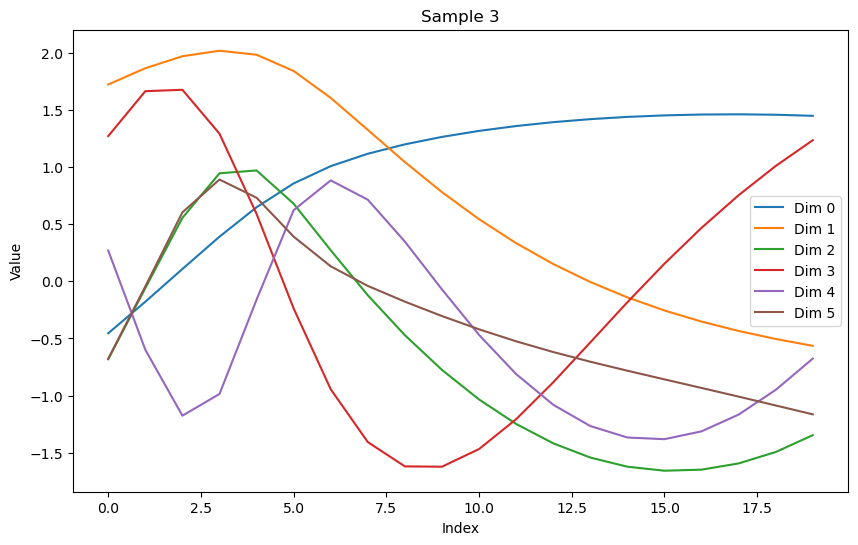

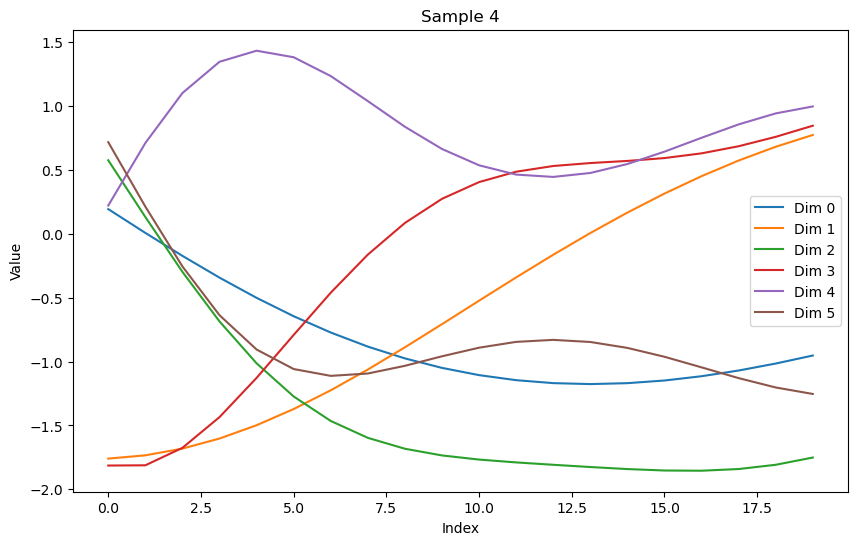

In [16]:
import random

import matplotlib.pyplot as plt

# 从 train_loader 中随机选择几个样本
num_samples = 5
samples = random.sample(list(train_loader), num_samples)

# 绘制每个样本
for i, sample in enumerate(samples):
    data = sample
    plt.figure(figsize=(10, 6))
    for j in range(data[0].shape[-1]):
        plt.plot(data[0][0, :, j], label=f'Dim {j}')
    plt.title(f'Sample {i}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

In [17]:
print(sample)

[tensor([[[ 0.1934, -1.7598,  0.5756, -1.8142,  0.2214,  0.7175],
         [ 0.0072, -1.7343,  0.1318, -1.8123,  0.7106,  0.2132],
         [-0.1726, -1.6817, -0.2978, -1.6757,  1.1020, -0.2553],
         ...,
         [-1.0702,  0.5737, -1.8415,  0.6855,  0.8566, -1.1298],
         [-1.0156,  0.6815, -1.8083,  0.7592,  0.9426, -1.2030],
         [-0.9528,  0.7739, -1.7515,  0.8464,  0.9972, -1.2538]],

        [[-0.3963, -1.7335, -0.6802, -1.3564,  1.0600, -0.6756],
         [-0.6346, -1.7268, -0.8452, -0.8407,  0.4778, -0.7603],
         [-0.8394, -1.6363, -0.7031, -0.1336, -0.3614, -0.5669],
         ...,
         [-1.2952,  0.7629, -0.0160, -1.3880, -0.6490,  0.5569],
         [-1.2179,  0.8708, -0.4196, -1.3349, -0.4296,  0.2870],
         [-1.1059,  1.0039, -0.8155, -1.0802,  0.0098, -0.1745]],

        [[ 0.0259, -0.2394,  0.2918, -0.4043, -0.1061,  0.2456],
         [ 0.0298, -0.1890,  0.3050, -0.3549, -0.1433,  0.2557],
         [ 0.0383, -0.1419,  0.3295, -0.3130, -0.1895,  0